In [1]:
import numpy as np
import pandas as pd
import os

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image

In [3]:
from matplotlib import pyplot as plt

In [4]:
from sklearn.manifold import TSNE

In [5]:
labels_df = pd.read_csv('train_v2.csv')

In [6]:
labels_df['image_name'] = labels_df['image_name'].apply(lambda x: f"{x}.jpg")

In [7]:
data_dir = 'D:/DOWNLOADS/train-jpg/train-jpg'

In [8]:
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

In [9]:
batch_size = 32
target_size = (224, 224)

In [10]:
generator = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=data_dir,
    x_col='image_name',
    y_col=None,  # No labels
    target_size=target_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode=None
)

Found 40479 validated image filenames.


In [11]:
first_batch = next(generator)
print(f"First batch shape: {first_batch.shape}")

First batch shape: (32, 224, 224, 3)


In [12]:
base_model = ResNet50(weights='imagenet', include_top=False)

In [13]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
feature_extractor = Model(inputs=base_model.input, outputs=x)

In [14]:
features = feature_extractor.predict(generator, verbose=1)
print(f"Extracted features shape: {features.shape}")

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1265/1265 ━━━━━━━━━━━━━━━━━━━━ 900s 708ms/step
Extracted features shape: (40479, 2048)


In [15]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=300)
reduced_features = tsne.fit_transform(features)
print(f"Reduced features shape after t-SNE: {reduced_features.shape}")

Reduced features shape after t-SNE: (40479, 2)


In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=50, random_state=42)  
pca_features = pca.fit_transform(features)
print(f"PCA reduced features shape: {pca_features.shape}")

PCA reduced features shape: (40479, 50)


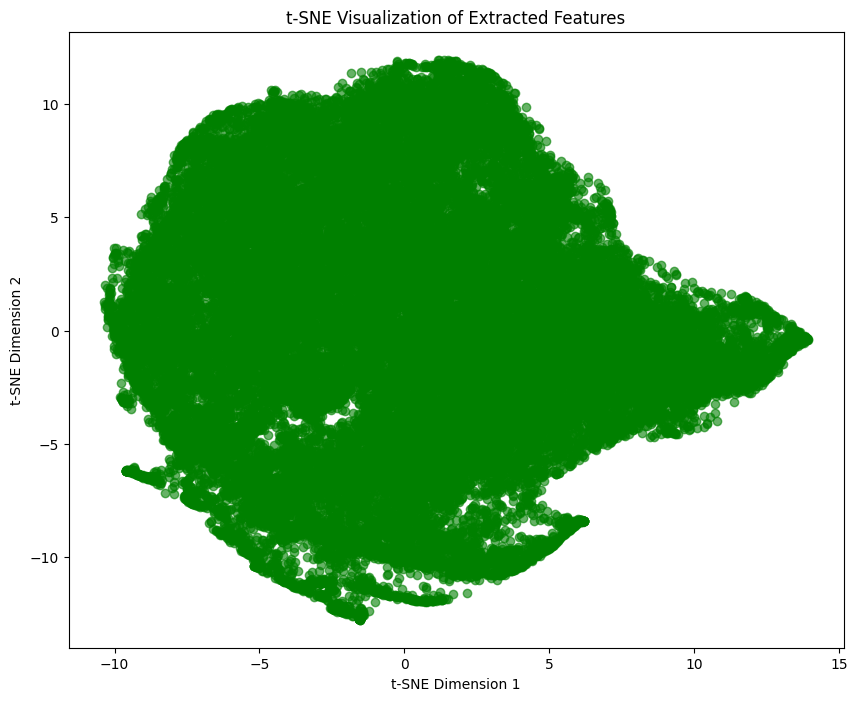

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c='green', alpha=0.6)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of Extracted Features")
plt.show()

In [20]:
def visualize_images_with_features(reduced_features, num_images=10):
    plt.figure(figsize=(15, 10))
    indices = np.random.choice(range(len(reduced_features)), num_images, replace=False)
    for i, idx in enumerate(indices):
        img_name = labels_df.iloc[idx]['image_name']
        img_path = os.path.join(data_dir, img_name)
        img = image.load_img(img_path, target_size=target_size)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Feature: ({reduced_features[idx, 0]:.2f}, {reduced_features[idx, 1]:.2f})")
    plt.tight_layout()
    plt.show()

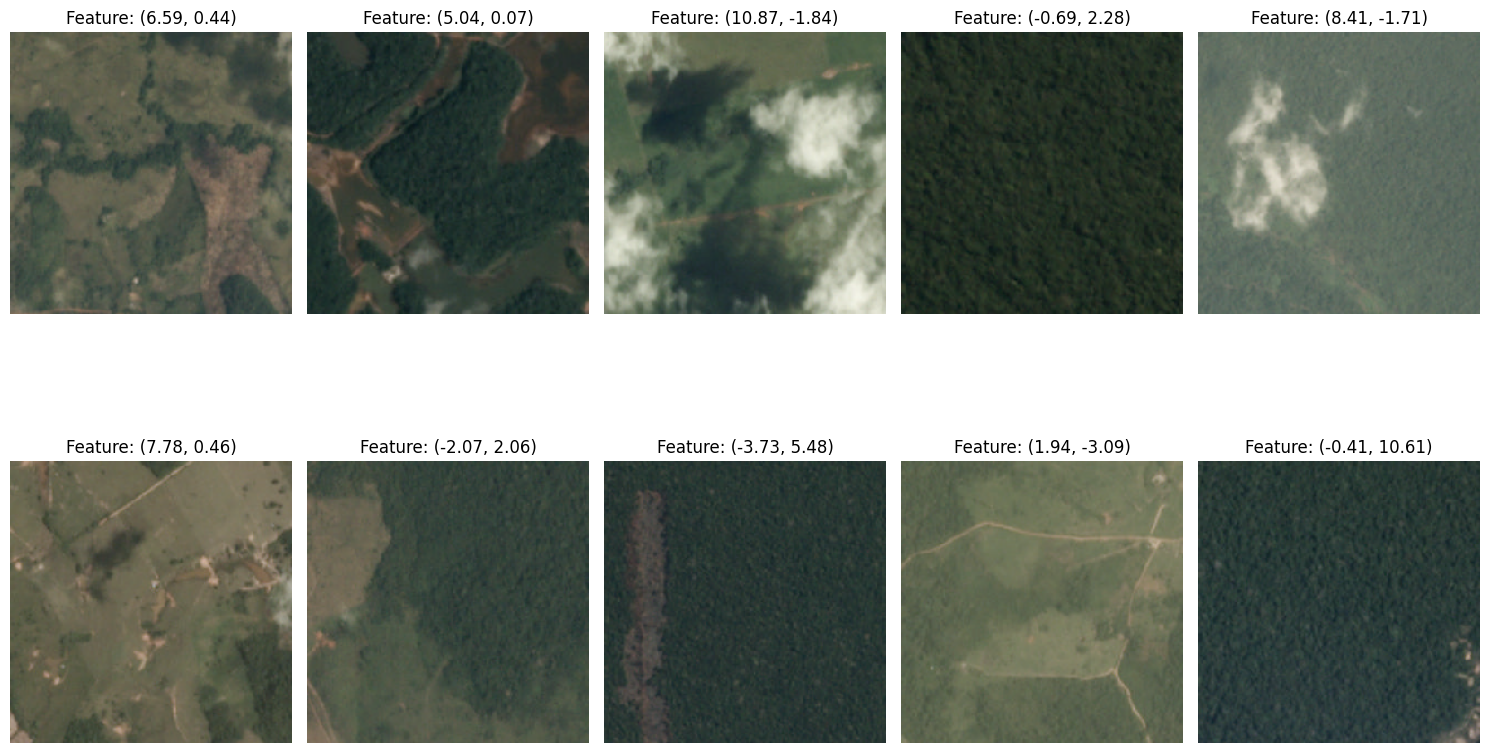

In [21]:
visualize_images_with_features(reduced_features)